<a href="https://colab.research.google.com/github/AlvaroMAlves/segment_cliente/blob/main/C%C3%B3pia_de_Projeto_Segmenta%C3%A7%C3%A3o_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO: SEGMENTAÇÃO DE CLIENTES**




# **Introdução**



O objetivo principal deste estudo é fazer uma segmentação de clientes, dentro de um contexto de marketing, utilizando dois métodos: **classificação RFV** (Recência, Frequência e Valor) e ***K-MEANS*** - um modelo de machine learning não-supervisionado para clusterização.

Foram utilizados dados brutos do Google Merchandising Store, que podem ser encontrados neste link: https://drive.google.com/drive/folders/1eseWZ0FbpXDXfU8F6F7-JxzScfzvoR2e?usp=drive_link.

A partir de três tabelas, construí uma consulta utilizando a linguagem SQL no *SQL Server Management Studio*, para retornar apenas os **usuários que converteram**, juntamente com as **Sessões conversoras**, a **quantidade de transações**, a **Receita**, a **Receita média por transação** e a **data da última transação**.

Uma cópia dessa consulta, e da tabela final podem ser encontradas aqui:
https://drive.google.com/file/d/1vB8geFT5CH8hdbM7BpbsT0F06MW9qNLl/view?usp=drive_link

Utilizarei a tabela criada na consulta para segmentar os usuários pelos métodos descritos acima.

Ao final, poderei comparar os dois para ter mais clareza sobre a distinção dos grupos, e avaliar melhores estratégias de marketing e comunicação.


## **Instalação das bibliotecas necessárias**


In [1]:
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade scikit-learn
!pip install pyclustertend
!pip install sklearn.utils
!pip install xlsxwriter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=24897500 sha256=46cc693d524051169a449e0cb80eed272dbabba6b6f7b8d4fa593c06321bc3ef
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.

## **Importação das bibliotecas**

In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt # Para gerar os gráficos
import seaborn as sns # Para gerar gráficos
import datetime as dt # Para facilitar a manipulação de dados com datas
import numpy as np
import xlsxwriter # para exportar tabelas em formato excel
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import datasets



---


##**Carregando os dados do Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SOLUCAO_EXERCICIO_1.csv', sep = ';', decimal = ',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


## **Verificação da tabela**

In [ ]:
display(df)

,usuario,Sessoes,Sessoes_Conversoras,Quant_transacoes,Receita,Receita_media_por_transacao,Data
0,1.814170e+18,15,7,7,7073.51,1010.50,31/07/2017
1,2.969960e+18,6,2,2,4739.98,2369.99,26/04/2017
2,2.904330e+18,31,8,9,4331.24,481.25,06/04/2018
3,3.835130e+18,6,3,3,4034.48,1344.83,21/02/2017
4,6.052210e+18,4,2,2,3314.40,1657.20,25/07/2017
...,...,...,...,...,...,...,...
697,8.199180e+18,1,1,1,7.49,7.49,19/03/2018
698,2.503540e+16,2,1,1,7.00,7.00,10/12/2017
699,4.868130e+18,2,1,1,6.99,6.99,20/10/2016
700,9.880300e+18,1,1,1,5.99,5.99,26/10/2016



Não há nenhum dado nulo:


In [ ]:
print( df.isnull().any() )

usuario                        False
Sessoes                        False
Sessoes_Conversoras            False
Quant_transacoes               False
Receita                        False
Receita_media_por_transacao    False
Data                           False
dtype: bool


Para análise inicial, vamos averiguar alguns valores estatísticos de cada coluna numérica:

In [ ]:
df.describe()

,usuario,Sessoes,Sessoes_Conversoras,Quant_transacoes,Receita,Receita_media_por_transacao
count,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,4.457009e+18,2.934473,1.163818,1.216524,172.513262,119.641325
std,3.099165e+18,4.160645,0.611540,0.803956,489.620478,239.668839
min,5.879660e+15,1.000000,1.000000,1.000000,5.590000,5.590000
25%,1.434478e+18,1.000000,1.000000,1.000000,28.940000,27.990000
50%,4.263470e+18,2.000000,1.000000,1.000000,56.990000,54.285000
75%,7.264475e+18,3.000000,1.000000,1.000000,125.302500,110.710000
max,9.959160e+18,79.000000,8.000000,11.000000,7073.510000,2877.000000


Já é possível obter algumas informações importantes, como o grande desvio padrão da coluna "Receita", e as diferenças dos terceiros quartis para os máximos de cada coluna, indicando a presença de *outliers*.

Para este estudo, não serão removidos os *outliers*, já que não derivam de erros e são parte importante da população que estamos estudando.

---
## **Elaboração da tabela RFV**





Os indicadores RFV são:

**Recência:** a diferença entre a data da última transação do cliente e a data da transação mais recente entre todos os clientes. Esse valor será mensurado em dias, e,  quanto menor, mais recente é a compra.

**Frequência:** Quantidade de transações feitas por cada cliente (usuário), durante um intervalo de tempo determinado.

**Valor:** A soma dos valores das receitas de cada transação, por clientes.

Agora, será inserida na tabela inicial a coluna "Recencia":

In [ ]:
# Transformando a Data num objeto 'datetime':
df['Data'] = pd.to_datetime(df['Data'])

# Encontrando a data mais recente e acrescentando 1:
max_data = df['Data'].max()
max_data = max_data + pd.DateOffset(days=1)

# Contando os dias entre a data da última compra (somada de um) e a data mais recente entre todas:
df['Recencia'] = (max_data - df['Data']).dt.days

# Verificando a tabela:
df.head()

,usuario,Sessoes,Sessoes_Conversoras,Quant_transacoes,Receita,Receita_media_por_transacao,Data,Recencia
0,1.814170e+18,15,7,7,7073.51,1010.50,2017-07-31,491
1,2.969960e+18,6,2,2,4739.98,2369.99,2017-04-26,587
2,2.904330e+18,31,8,9,4331.24,481.25,2018-06-04,183
3,3.835130e+18,6,3,3,4034.48,1344.83,2017-02-21,651
4,6.052210e+18,4,2,2,3314.40,1657.20,2017-07-25,497


Elaboração da tabela de "Recencia", "Frequencia" e "Valor":

In [ ]:
rfv = df[['usuario', 'Recencia', 'Quant_transacoes', 'Receita']]
rfv.columns = ['Usuario', 'Recencia', 'Frequencia', 'Valor']


Vamos indexar a coluna "Usuario", e verificar como ficou a tabela:

In [ ]:
rfv = rfv.set_index('Usuario')
rfv

,Recencia,Frequencia,Valor
Usuario,,,
1.814170e+18,491,7,7073.51
2.969960e+18,587,2,4739.98
2.904330e+18,183,9,4331.24
3.835130e+18,651,3,4034.48
6.052210e+18,497,2,3314.40
...,...,...,...
8.199180e+18,260,1,7.49
2.503540e+16,418,1,7.00
4.868130e+18,775,1,6.99


Essa tabela ("rfv") será utilizada para os dois modelos de segmentação, pela classificação por pontuações dos indicadores e pela clusterização pelo *K-means*.

---
### Análise da Recência
Percebe-se que os valores de recência estão muito altos:

In [ ]:
# Cálculo da média e desvio padrão da Recência
print("RECÊNCIA \n\nMédia:",rfv['Recencia'].mean(), "\nDesvio padrão:",rfv['Recencia'].std())

RECÊNCIA 

Média: 544.6609686609687 
Desvio padrão: 202.66668457453864


Ao verificar o histograma da coluna "Recencia", vemos que é uma distribuição normal:


In [ ]:
fig = px.histogram(data_frame = rfv, x="Recencia")
fig.show()

Portanto, temos que, na média, a última transação dos clientes foi há 544 dias, praticamente 1 ano e meio. Além disso, aproximadamente 70% dos clientes obtiveram a última compra entre 1 e 2 anos atrás.

Ações visando aumentar engajamento podem ser estratégias importantes.





---

# **Segmentação pela classificação RFV**

---
##**Atribuição de pontuações aos indicadores**

Cada indicador terá uma pontuação de 1 a 5. Os 20% maiores ficarão com nota 5; entre 60% e 80% maiores, nota 4, e assim por diante. O inverso vale para a recência, onde as maiores notas são para os menores valores, já que denotam o quão recente foi a última compra. Além disso, a soma das pontuações fará uma pontuação geral, que será utilizada para a segmentação.

In [ ]:
# Copiando a tabela rfv para rfv_s (s de 'scored')
rfv_s = rfv.copy(deep=True)

# Criando as colunas de pontuações
rfv_s["Pontuacao de Recencia"] = pd.qcut(rfv_s['Recencia'], 5, labels=[5, 4, 3, 2, 1])

# Como a frequência possui muitos valores iguais a 1, os valores foram ranqueados utilizando o método "first",
# que não é o mais apropriado, mas o único que foi possível
rfv_s["Pontuacao de Frequencia"] = pd.qcut(rfv_s['Frequencia'].rank(method = 'first'), 5, labels=[1, 2, 3, 4, 5])

rfv_s["Pontuacao de Valor"] = pd.qcut(rfv_s['Valor'], 5, labels=[1, 2, 3, 4, 5])

# Coluna Pontuação geral
rfv_s['Pontuacao'] = rfv_s['Pontuacao de Recencia'].astype(int) + rfv_s['Pontuacao de Frequencia'].astype(int) + rfv_s['Pontuacao de Valor'].astype(int)

# Verificando a tabela
rfv_s

,Recencia,Frequencia,Valor,Pontuacao de Recencia,Pontuacao de Frequencia,Pontuacao de Valor,Pontuacao
Usuario,,,,,,,
1.814170e+18,491,7,7073.51,3,5,5,13
2.969960e+18,587,2,4739.98,2,5,5,12
2.904330e+18,183,9,4331.24,5,5,5,15
3.835130e+18,651,3,4034.48,2,5,5,12
6.052210e+18,497,2,3314.40,3,5,5,13
...,...,...,...,...,...,...,...
8.199180e+18,260,1,7.49,5,5,1,11
2.503540e+16,418,1,7.00,4,5,1,10
4.868130e+18,775,1,6.99,1,5,1,7


Aqui é possível notar uma dificuldade em separar grupos utilizando a frequência, já que a grande maioria dos valores é igual a 1. O método utilizado para ranqueamento ("first") faz com que valores iguais tenham pontuações diferentes, pois "força" o resultado. No gráfico 3D mais abaixo isso ficará evidente, e demonstrará uma limitação deste modelo de segmentação por classificação.

## **Níveis para cada pontuação**



A segmentação se dará da seguinte maneira:


*   Clientes Inativos: 3 a 6 pontos
*   Clientes médios: 7 a 9 pontos
*   Clientes bons: 10 a 12 pontos
*   Clientes ótimos: 13 a 15 pontos


In [ ]:
def rfv_nivel(score):
    if  ((score >= 3) and (score <= 6)):
        return 'Inativo'
    elif ((score > 6) and (score <= 9)):
        return 'Médio'
    elif ((score > 9) and (score <= 12)):
        return 'Bom'
    else:
        return 'Ótimo'

# Criando coluna 'Nivel' na tabela rfv_s
rfv_s['Nivel'] = rfv_s['Pontuacao'].apply(lambda score : rfv_nivel(score))
rfv_s.head()

,Recencia,Frequencia,Valor,Pontuacao de Recencia,Pontuacao de Frequencia,Pontuacao de Valor,Pontuacao,Nivel
Usuario,,,,,,,,
1.814170e+18,491,7,7073.51,3,5,5,13,Ótimo
2.969960e+18,587,2,4739.98,2,5,5,12,Bom
2.904330e+18,183,9,4331.24,5,5,5,15,Ótimo
3.835130e+18,651,3,4034.48,2,5,5,12,Bom
6.052210e+18,497,2,3314.40,3,5,5,13,Ótimo




---


## **Gráfico de barras: Quantidade de clientes em cada nível**

In [ ]:
fig = px.histogram(data_frame = rfv_s, x='Nivel', color = 'Nivel',
                   color_discrete_map = {'Ótimo':'#ff4600', 'Bom':'#ff8427', 'Médio':'#ff8452', 'Inativo':'#ff9a9e'})

fig.show()



---


## **Análise de cada nível**

Para cada nível, vamos calcular as médias dos indicadores RFV, além da soma para a receita:

In [ ]:
rfv_s.groupby('Nivel', sort = False).agg({
    'Recencia' : ['mean'],
    'Frequencia' : ['mean'],
    'Valor' : ['mean', 'sum', 'count']})


Recencia Frequencia       Valor                
               mean       mean        mean       sum count
Nivel                                                     
Ótimo    386.644444   3.133333  887.226667  39925.20    45
Bom      374.348018   1.246696  177.426035  40275.71   227
Médio    619.840970   1.000000  100.573127  37312.63   371
Inativo  847.711864   1.000000   60.860508   3590.77    59

Ainda que o grupo "ótimo" tenha uma quantidade de clientes menor em comparação aos grupos "médio" e "bom", os três possuem um valor agregado de receita semelhante (em torno de US$ 40.000,00) confirmando a grande relevância deste grupo para a empresa.




---

## **Gráfico 3D: Avaliação da segmentação de clientes**

In [ ]:
fig = px.scatter_3d(rfv_s, x='Recencia', y='Frequencia', z='Valor', color='Nivel')
fig.update_traces(marker_size = 5)
fig.show()

Neste gráfico observamos uma sobreposição entre os grupos “Inativo” e “Médio” e entre os grupos “Médio” e “Bom”. Isso ocorre principalmente pela limitação de ranqueamento da coluna “Frequência”.

Com o objetivo de superar esta dificuldade aplicaremos a seguir o método *K-means* para clusterização de clientes.

# **Clusterização de clientes pelo método *K-means***

A clusterização será feita a partir da tabela de RFV. A ideia é obter mais informações que possam auxiliar nas decisões e estratégias, além de evitar cair no problema da pontuação da frequência.

Para isso, voltamos à tabela RFV:

In [ ]:
rfv

,Recencia,Frequencia,Valor
Usuario,,,
1.814170e+18,491,7,7073.51
2.969960e+18,587,2,4739.98
2.904330e+18,183,9,4331.24
3.835130e+18,651,3,4034.48
6.052210e+18,497,2,3314.40
...,...,...,...
8.199180e+18,260,1,7.49
2.503540e+16,418,1,7.00
4.868130e+18,775,1,6.99



---

## **Padronização dos valores pelo método *Z-score***

Este passo é importante para normalizar os valores, que possuem diferentes alcances (*ranges*):

In [ ]:
#Z-score na tabela RFV
from scipy.stats import zscore
rfv_z = rfv.apply(zscore)
rfv_z

,Recencia,Frequencia,Valor
Usuario,,,
1.814170e+18,-0.264963,7.198898,14.104633
2.969960e+18,0.209059,0.975220,9.335237
2.904330e+18,-1.785784,9.688370,8.499832
3.835130e+18,0.525073,2.219956,7.893298
6.052210e+18,-0.235337,0.975220,6.421559
...,...,...,...
8.199180e+18,-1.405579,-0.269515,-0.337284
2.503540e+16,-0.625417,-0.269515,-0.338285
4.868130e+18,1.137352,-0.269515,-0.338305




---


## **Aplicação do método *Elbow* para encontrar o melhor número de clusters**

Como o *K-means* precisa de um número de *clusters* pré-definido, um método para avaliar o número *k* ideal é o método *Elbow*. Buscamos diminuir a distância *intra-cluster*, e aumentar a distância *inter-clusters*.

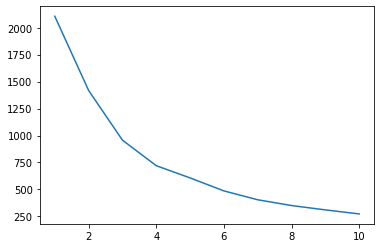

In [ ]:
#sqdc -> soma de quadrados das distâncias dentro do cluster
sqdc = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
    clustering.fit(rfv_z)
    sqdc.append(clustering.inertia_)

# Testando a 'sqdc' para valores de k entre 1 e 10
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = sqdc);

De acordo com o gráfico, um possível valor ideal para o número de *clusters* é 4.



---


## **Aplicação da técnica *K-means*, e visualizando o gráfico de barras dos grupos**

,Recencia,Frequencia,Valor
cluster_pred,,,
0,309,309,309
1,357,357,357
2,7,7,7
3,29,29,29


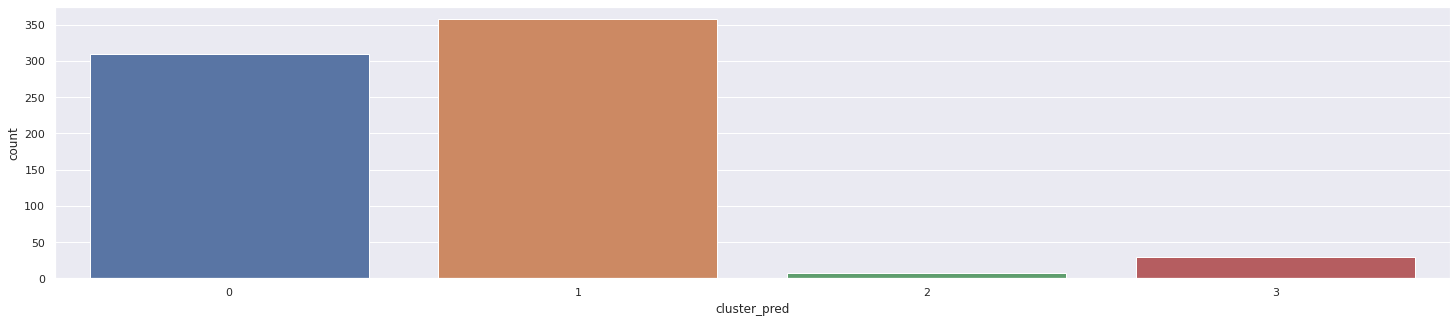

In [ ]:
#FAZENDO KMEANS COM 4 CLUSTERS
kmeans_rfv = KMeans(4, n_init = 10)
kmeans_rfv.fit(rfv_z)
#identified_clusters = kmeans_rfv.fit_predict(rfv)
clusters_scaled = rfv.copy()
clusters_scaled['cluster_pred'] = kmeans_rfv.fit_predict(rfv_z)
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

---
## **Elaboração do gráfico 3D para visualizar os grupos**

In [ ]:
fig = px.scatter_3d(clusters_scaled, x='Recencia', y='Frequencia', z='Valor', color='cluster_pred')
fig.update_traces(marker_size = 5)
fig.show()

---
##**Análise dos dados dos clusters**

In [ ]:
rfv['cluster'] = clusters_scaled['cluster_pred']

rfv.groupby('cluster').agg({
    'Recencia' : ['mean', 'min','max'],
    'Frequencia' : ['mean','min','max'],
    'Valor' : ['mean','min','max','sum','count']
})

Recencia            Frequencia                Valor           \
               mean  min   max       mean min max         mean      min   
cluster                                                                   
0        725.443366  561  1061   1.051780   1   2    99.340841     5.59   
1        394.025210   30   557   1.081232   1   2   124.542941     7.00   
2        445.428571  183   651   4.142857   1   9  4142.678571  2628.14   
3        496.724138    1   845   3.931034   3  11   584.393448    46.77   

                                  
             max       sum count  
cluster                           
0        1917.00  30696.32   309  
1        1928.20  44461.83   357  
2        7073.51  28998.75     7  
3        2210.09  16947.41    29

Analisando o gráfico e a tabela estatística dos *clusters* (acima), podemos definir os grupos de clientes em padrões: Alto, Médio, Baixo e Inativo:

*   *Cluster 0* (cor azul) ⇒ Caracterizado pela pior média de recência, frequência e valor; será o grupo "Inativo"

*   *Cluster 1* (cor roxa) ⇒ Possui a melhor Recência, frequência baixa e valor monetário também baixo; é o grupo "Padrão Baixo".

*   *Cluster 2* (cor goiaba) ⇒ Recência baixa, melhor média de frequência e alto valor monetário. Este é o grupo "Padrão Alto"

*   *Cluster 3* (cor amarela) ⇒ Recência decente, média de frequência alta e valor monetário também decente; é o grupo "Padrão Médio"





---
#**Resultados e Recomendações**

## **Padrão Alto**
Apesar de ser pequeno, este é o grupo de clientes mais favorável para a empresa e sem dúvida precisa de um tratamento diferenciado, buscando ainda mais sua fidelização.

As recomendações para este grupo incluem:

*   Ofertas exclusivas como frete grátis, desconto na compra ou entrega rápida;
*   Divulgação da marca da empresa (em mídias sociais, por exemplo);
*   Oferta de produtos adicionais, com desconto.







## **Padrão Médio**

São clientes leais à empresa e ativos. O foco neste grupo é aumentar o valor de suas compras.

As recomendações para este grupo são:

*   Fidelização com descontos especiais em datas importantes, baseados em seu histórico de compras;
*   Ofertas personalizadas em produtos;
*   E-mails com ofertas de produtos com preço baseado no valor médio de suas compras.



## **Padrão Baixo**

Embora o valor monetário seja baixo (em média), possui o melhor valor agregado de receita e são clientes com melhor pontuação de recência da empresa. Aparentemente, são clientes mais novos e merecem atenção, até mesmo por serem o maior grupo.

O foco neste grupo é aumentar o valor de suas compras - bem como a frequência das mesmas - e também ampliar a lembrança de marca da empresa.

As recomendações para este grupo incluem:

*   Fidelização com descontos especiais em datas importantes, baseados em seu histórico de compras;
*   E-mails com ofertas de produtos com preço baseado no valor médio de suas compras;
*   Divulgação da marca da empresa;
*   Divulgação de marketing de conteúdo personalizado, de acordo com os produtos comprados, através de *newsletters* ou mídias sociais, por exemplo.




## **Clientes Inativos**

É um grupo de clientes que fizeram a última compra há mais de 561 dias, com gasto médio de US$ 100,00, aproximadamente. Mesmo assim, é um grupo que não deve ser desconsiderado para elaboração de estratégias de marketing.

O foco é descobrir se houve algum problema que causou a evasão e procurar atraí-los novamente.

As recomendações para este grupo são:

*   Identificação da causa da evasão, com prêmios para responder questionários pontuais;
*   Ofertas com desconto especial;
*   Divulgação da marca e de conteúdo.

Além disso, a aplicação de pesquisas de satisfação frequentes (enquanto os clientes ainda estão ativos) pode aumentar o conhecimento do perfil dos clientes e fornecer dados importantes para prever e evitar a perda dos mesmos.

Geralmente, é mais fácil prevenir a evasão do que remediá-la.


---
#**Exportação dos dados**

Por fim, vamos gerar uma planilha do excel para cada padrão de cliente



---


## **Alocação dos padrões na tabela rfv**

In [ ]:
rfv['cluster'] = rfv['cluster'].replace([0, 1, 2, 3],['Inativo','Baixo','Alto','Médio'])
rfv.rename(columns = {'cluster':'Padrão'}, inplace = True)
rfv

,Recencia,Frequencia,Valor,Padrão
Usuario,,,,
1.814170e+18,491,7,7073.51,Alto
2.969960e+18,587,2,4739.98,Alto
2.904330e+18,183,9,4331.24,Alto
3.835130e+18,651,3,4034.48,Alto
6.052210e+18,497,2,3314.40,Alto
...,...,...,...,...
8.199180e+18,260,1,7.49,Baixo
2.503540e+16,418,1,7.00,Baixo
4.868130e+18,775,1,6.99,Inativo


---
## **Exportação da tabela de clientes segmentados convertida para o *Excel***

Para facilitar a localização e contato dos clientes e possibilitar a criação de uma mala direta de emails para cada grupo segmentados, foi realizada a conversão para um arquivo *.xlsx*.

In [ ]:
# Separação dos clientes por padrão, cada um com uma tabela própria:
alto = rfv[rfv['Padrão'] == 'Alto']
medio = rfv[rfv['Padrão'] == 'Médio']
baixo = rfv[rfv['Padrão'] == 'Baixo']
inativo = rfv[rfv['Padrão'] == 'Inativo']


In [ ]:
# Exportando para um arquivo de excel, separados por planilhas:
alto_df = pd.DataFrame()
alto_df["Usuario"] = alto.index

medio_df = pd.DataFrame()
medio_df["Usuario"] = medio.index

baixo_df = pd.DataFrame()
baixo_df["Usuario"] = baixo.index

inativo_df = pd.DataFrame()
inativo_df["Usuario"] = inativo.index

writer = pd.ExcelWriter('Clientes_segmentados.xlsx', engine='xlsxwriter')

inativo.to_excel(writer, sheet_name = 'Clientes Inativos')
baixo.to_excel(writer, sheet_name = 'Padrão Baixo')
medio.to_excel(writer, sheet_name = 'Padrão Médio')
alto.to_excel(writer, sheet_name = 'Padrão Alto')

writer.save()

É possível baixar o arquivo "Clientes_segmentados.xlsx" neste link:
https://docs.google.com/spreadsheets/d/1xUAlfUyYR5Nz03_YvGJbiEJGL60Y9Z63/edit?usp=share_link&ouid=109957021174915351776&rtpof=true&sd=true



---


#**Referências**

*RFM Segmentation and K-means Clustering*. Disponível em:
https://www.kaggle.com/code/anu1312/rfm-segmentation-and-k-means-clustering/notebook


Dawane, Vinit and Waghodekar, Prajakta and Pagare, Jayshri, *RFM Analysis Using K-Means Clustering to Improve Revenue and Customer Retention* (May 25, 2021). Proceedings of the International Conference on Smart Data Intelligence (ICSMDI 2021).
Available at SSRN: https://ssrn.com/abstract=3852887 or http://dx.doi.org/10.2139/ssrn.3852887

*RFM analysis (recency, frequency, monetary)* (por Gavin Wright). Disponível em: https://www.techtarget.com/searchdatamanagement/definition/RFM-analysis

*Clustering — Conceitos básicos, principais algoritmos e aplicações* (por Felipe Azank e Gustavo Corrêa).
Disponível em: https://medium.com/turing-talks/clustering-conceitos-b%C3%A1sicos-principais-algoritmos-e-aplica%C3%A7%C3%A3o-ace572a062a9

Y. Huang, M. Zhang and Y. He, *Research on improved RFM customer segmentation model based on K-Means algorithm*, 2020 5th International Conference on Computational Intelligence and Applications (ICCIA), 2020, pp. 24-27, doi: 10.1109/ICCIA49625.2020.00012.

*Guidelines for Removing and Handling Outliers in Data* (por Jim Frost). Disponível em: https://statisticsbyjim.com/basics/remove-outliers/

*Customer Segmentation of a Brazilian e-commerce business* (por Lars Tinnefeld). Disponível em: https://medium.com/mlearning-ai/customer-segmentation-of-a-brazilian-e-commerce-business-c6dae31a7861

*How to assign RFM scores with quantile-based discretization* (por Matt Clarke). Disponível em: https://practicaldatascience.co.uk/data-science/how-to-assign-rfm-scores-with-quantile-based-discretization